In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import figure
import math

In [114]:
# Dataset from NOAA 
df = pd.read_csv("/home/julien/Documents/1603171.csv")
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y',errors='coerce')
df.head(10)

date  prcp  tavg  tmax  tmin
0 1945-03-01   2.1   NaN   6.8  -0.9
1 1945-03-02   1.0   NaN   6.0  -1.0
2 1945-03-03   3.8   NaN   5.8   0.2
3 1945-03-04   4.4   NaN   6.8   0.0
4 1945-03-05   7.2   NaN   5.8   1.3
5 1945-03-06   7.2   NaN   6.7   5.0
6 1945-03-07   3.8   NaN   6.8   5.2
7 1945-03-08   0.4   NaN   8.3   1.3
8 1945-03-09   0.0   NaN   8.8   3.5
9 1945-03-10   0.0   NaN   9.2   4.7

In [115]:
df['year'] = df['date'].dt.year
df = df.loc[df["year"] != 2019]

df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
#df.sort_values(by=['day', 'month', 'year'], inplace=True)
df.sort_index(inplace=True)
df['dayofyear'] = df['date'].dt.dayofyear

df.tail(10)

date  prcp  tavg  tmax  tmin  year  month  day  dayofyear
26663 2018-12-22   NaN  10.0  11.5   NaN  2018     12   22        356
26664 2018-12-23   NaN   9.1  11.7   7.3  2018     12   23        357
26665 2018-12-24   NaN   5.3   7.7   NaN  2018     12   24        358
26666 2018-12-25   NaN   0.9   5.7   NaN  2018     12   25        359
26667 2018-12-26   NaN   0.3   NaN  -2.2  2018     12   26        360
26668 2018-12-27   NaN   1.6   4.8  -0.7  2018     12   27        361
26669 2018-12-28   NaN   0.1   NaN  -2.1  2018     12   28        362
26670 2018-12-29   NaN   4.6   NaN   0.9  2018     12   29        363
26671 2018-12-30   NaN   6.1   NaN   NaN  2018     12   30        364
26672 2018-12-31   NaN   8.4   9.0   NaN  2018     12   31        365

In [116]:
dayofyear_df = df.groupby(df['date'].dt.dayofyear).mean()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f77ff662668>,
      dtype=object)

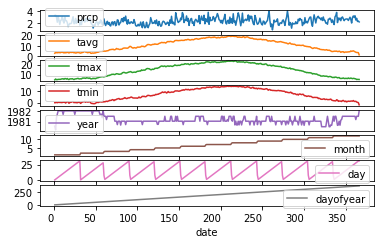

In [117]:
dayofyear_df.plot(rot=0, subplots=True)

In [118]:
df_records_tmax = df.groupby(df['date'].dt.dayofyear)['tmax'].transform(max)

In [119]:
df_records_tmax.head(200)

0      20.0
1      17.1
2      15.8
3      18.1
4      17.9
5      19.5
6      18.0
7      19.1
8      21.1
9      18.9
10     19.5
11     19.4
12     19.9
13     18.2
14     18.9
15     21.8
16     22.5
17     22.1
18     19.7
19     21.0
20     19.9
21     23.0
22     23.1
23     21.5
24     21.3
25     20.8
26     21.7
27     21.7
28     22.1
29     24.2
       ... 
170    34.4
171    35.0
172    34.1
173    30.6
174    30.6
175    32.0
176    30.3
177    32.2
178    32.9
179    33.4
180    33.8
181    31.2
182    30.0
183    31.1
184    29.2
185    27.5
186    31.0
187    32.4
188    33.3
189    28.6
190    27.2
191    28.9
192    27.4
193    29.6
194    30.9
195    31.1
196    30.7
197    31.6
198    31.1
199    30.2
Name: tmax, Length: 200, dtype: float64

In [120]:
f = lambda x: math.sqrt((x.tmax - dayofyear_df.loc[x.date.dayofyear].tmax)**2)


In [121]:
df["tmax_std_dev"] = df.apply(f, axis=1, result_type='reduce')

In [122]:
df.head(10)

date  prcp  tavg  tmax  tmin  year  month  day  dayofyear  \
0 1945-03-01   2.1   NaN   6.8  -0.9  1945      3    1         60   
1 1945-03-02   1.0   NaN   6.0  -1.0  1945      3    2         61   
2 1945-03-03   3.8   NaN   5.8   0.2  1945      3    3         62   
3 1945-03-04   4.4   NaN   6.8   0.0  1945      3    4         63   
4 1945-03-05   7.2   NaN   5.8   1.3  1945      3    5         64   
5 1945-03-06   7.2   NaN   6.7   5.0  1945      3    6         65   
6 1945-03-07   3.8   NaN   6.8   5.2  1945      3    7         66   
7 1945-03-08   0.4   NaN   8.3   1.3  1945      3    8         67   
8 1945-03-09   0.0   NaN   8.8   3.5  1945      3    9         68   
9 1945-03-10   0.0   NaN   9.2   4.7  1945      3   10         69   

   tmax_std_dev  
0      0.747222  
1      2.034783  
2      2.281429  
3      1.614286  
4      2.623944  
5      2.417143  
6      2.105479  
7      1.138028  
8      0.697183  
9      0.977465

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f77ff5839b0>,
      dtype=object)

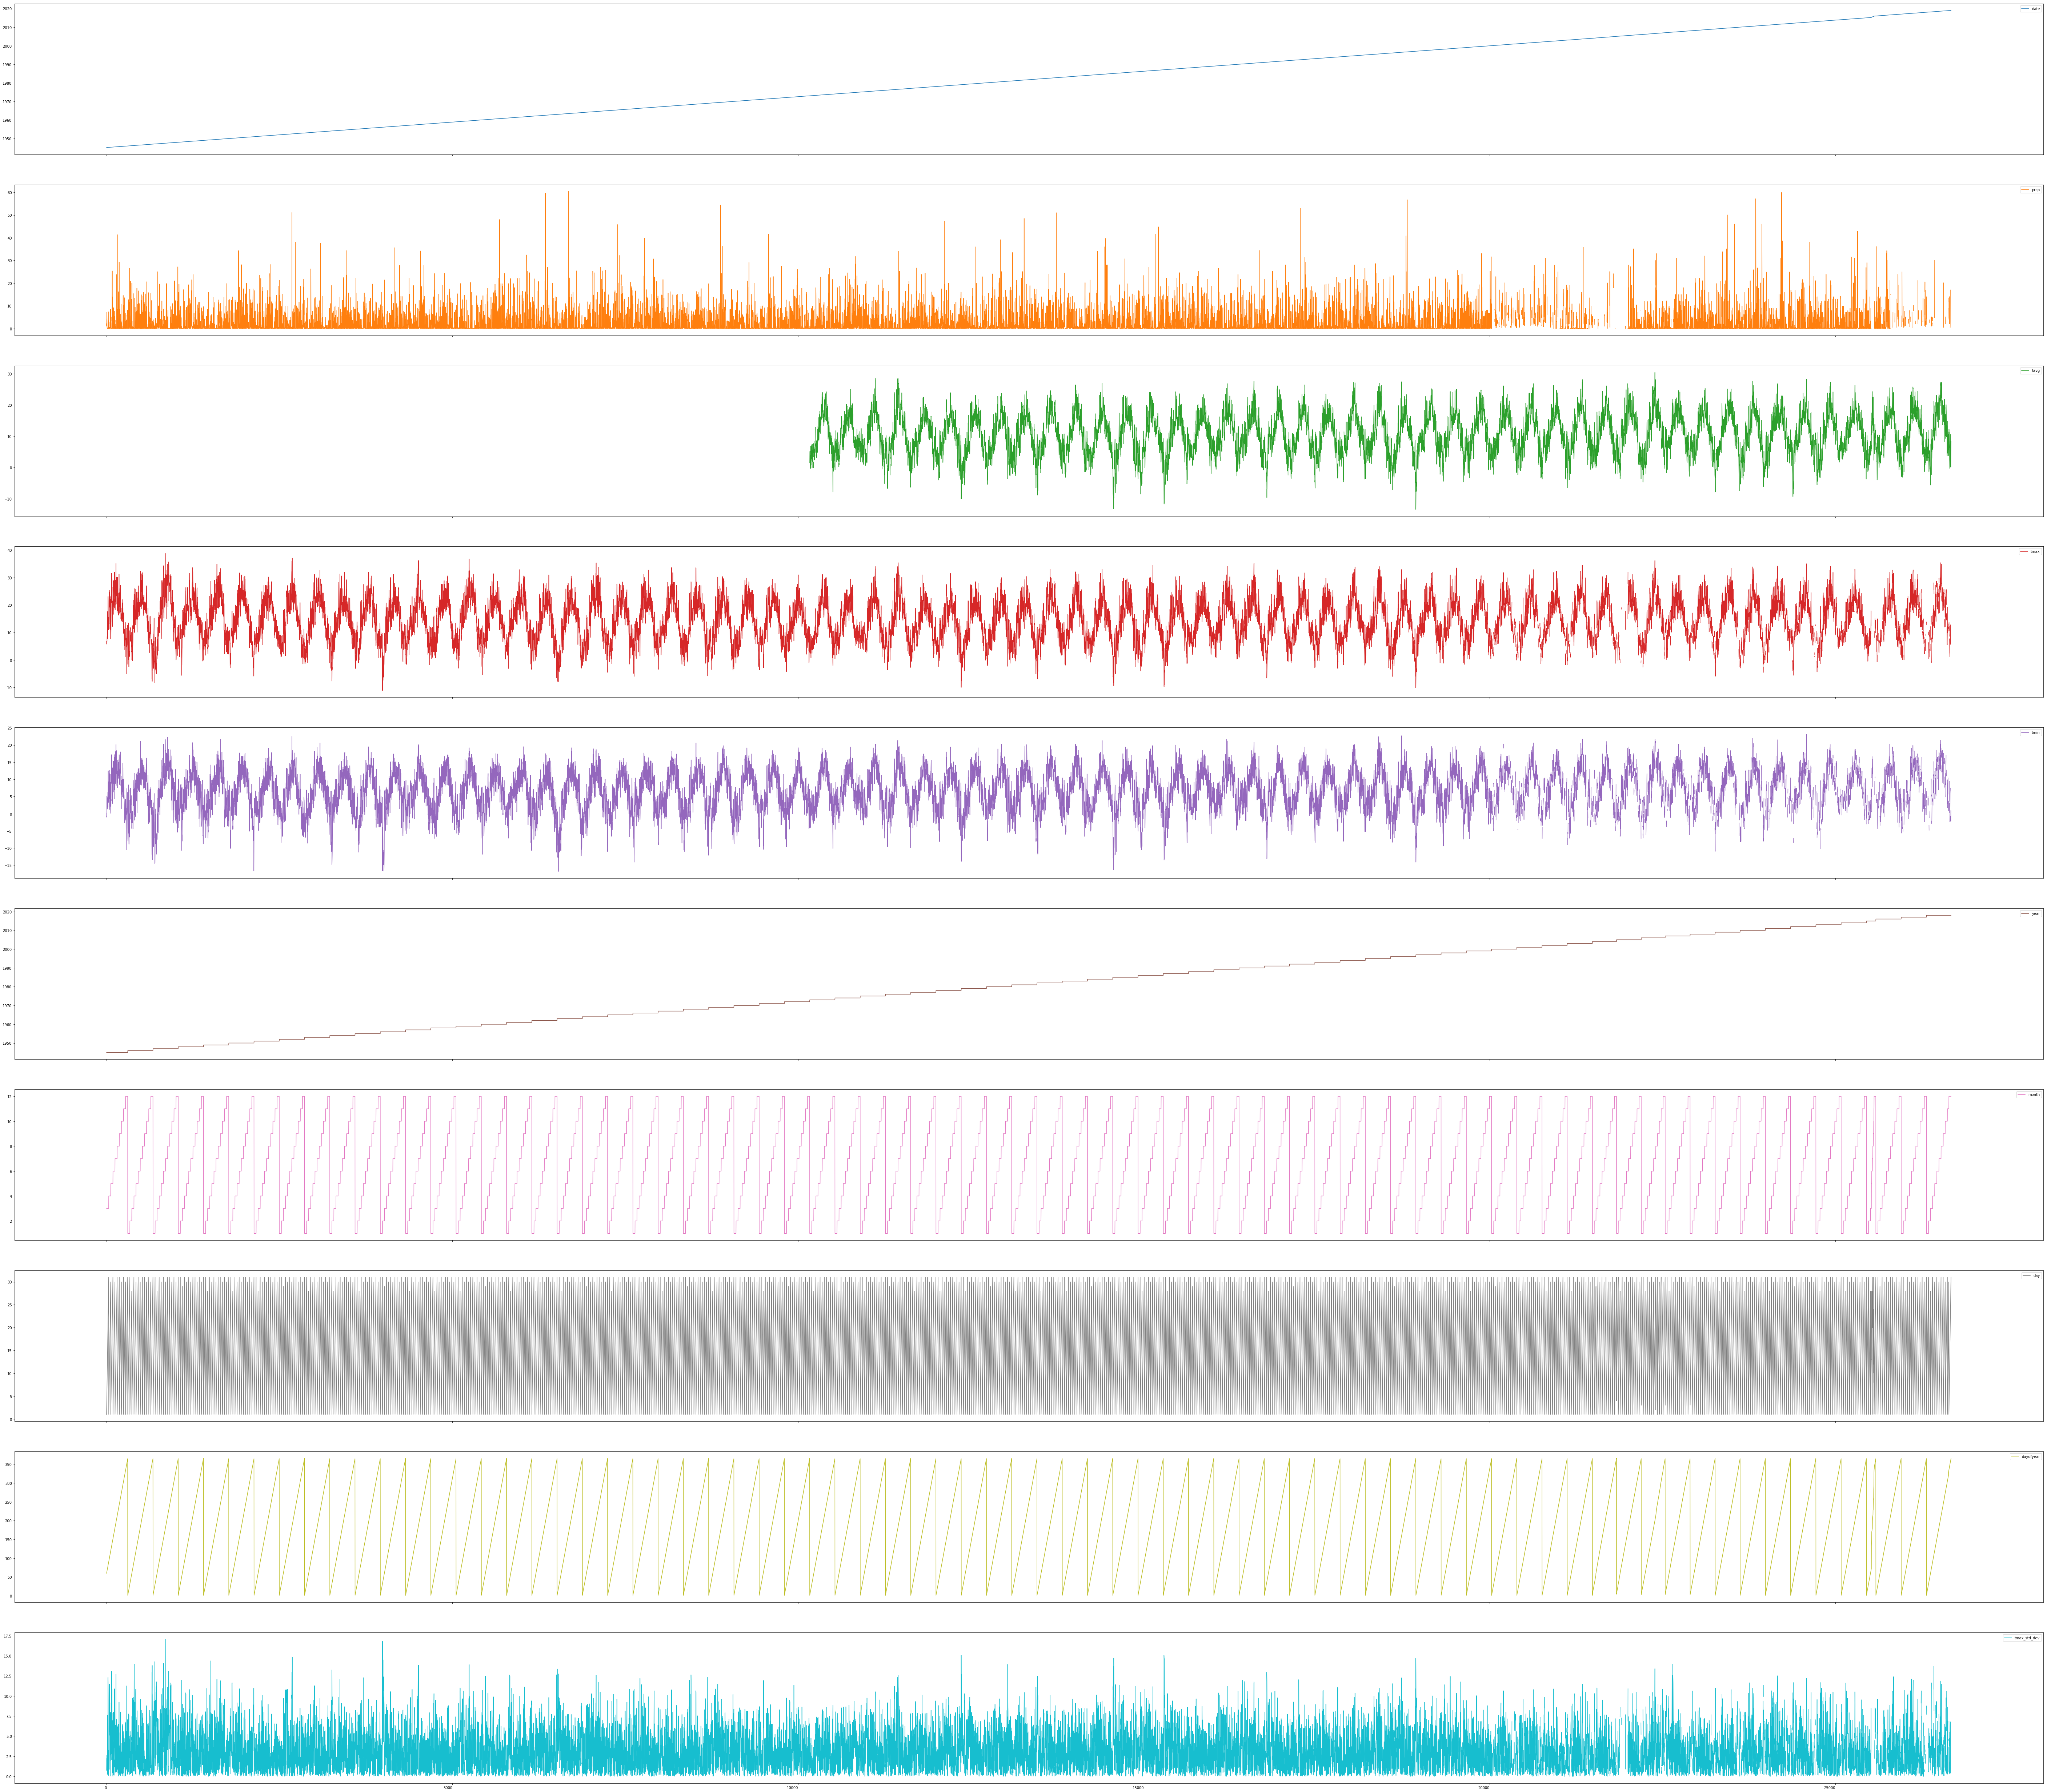

In [123]:
df.plot(rot=0, subplots=True, figsize=(100,100))

In [124]:
df_yearly_tmax_std_dev = df.groupby(df['date'].dt.year).mean()

In [125]:
df_yearly_tmax_std_dev.tail(5)

prcp       tavg       tmax      tmin    year     month        day  \
date                                                                          
2014  2.075138  11.957260  16.476418  8.704688  2014.0  6.526027  15.720548   
2015  2.964773   8.316058   7.647297  4.840260  2015.0  5.313869  16.153285   
2016  3.930332  10.671858  15.053265  7.664889  2016.0  6.513661  15.756831   
2017  5.733684  11.297808  15.813592  8.055042  2017.0  6.526027  15.720548   
2018  6.291379  12.102809  17.166537  9.403111  2018.0  6.418539  15.592697   

       dayofyear  tmax_std_dev  
date                            
2014  183.000000      3.048099  
2015  146.912409      2.747778  
2016  183.500000      2.859832  
2017  183.000000      3.203057  
2018  179.587079      3.597525

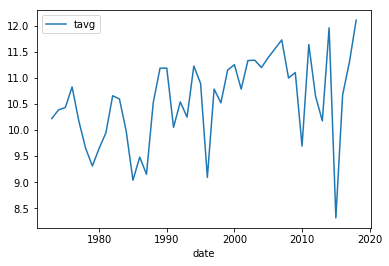

In [126]:
df_yearly_tmax_std_dev.plot(use_index=True, y='tavg')

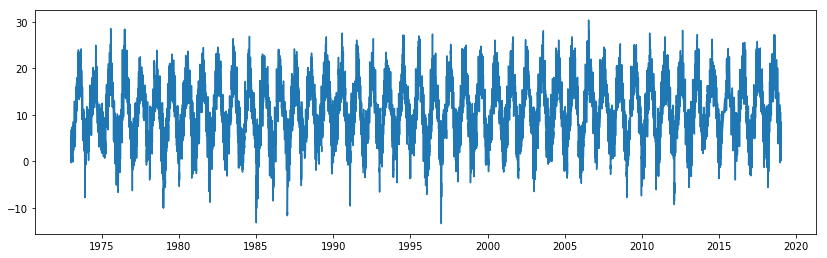

In [127]:
fig = plt.figure(figsize=(14,14))
ax = plt.subplot(311)
x = df.date
y = df.tavg
ax.xaxis_date()
ax.plot(x,y)

In [128]:
plt.show()

In [129]:
df_1_january = df[(df.month == 1) & (df.day == 1)]

In [130]:
df_1_january.head(40)

date  prcp  tavg  tmax  tmin  year  month  day  dayofyear  \
306   1946-01-01   0.0   NaN  -1.0  -4.1  1946      1    1          1   
671   1947-01-01   0.2   NaN   3.8   0.2  1947      1    1          1   
1036  1948-01-01  11.4   NaN  11.3  -0.2  1948      1    1          1   
1402  1949-01-01   0.8   NaN   8.0  -0.1  1949      1    1          1   
1767  1950-01-01   0.0   NaN   4.5  -3.7  1950      1    1          1   
2132  1951-01-01   2.8   NaN   4.5  -6.5  1951      1    1          1   
2497  1952-01-01   8.2   NaN   9.0   1.5  1952      1    1          1   
2863  1953-01-01   1.7   NaN   4.3  -2.7  1953      1    1          1   
3228  1954-01-01   0.0   NaN   1.4  -3.4  1954      1    1          1   
3593  1955-01-01   0.0   NaN   1.4  -2.3  1955      1    1          1   
3958  1956-01-01  10.5   NaN   7.5   0.1  1956      1    1          1   
4324  1957-01-01   5.4   NaN   4.2   1.2  1957      1    1          1   
4689  1958-01-01   3.3   NaN   8.3   4.2  1958      1    1          1   
5054  1959-01-01   8.4   NaN   8.0   1.7  1959      1    1          1   
5419  1960-01-01  12.6   NaN  10.9   7.6  1960      1    1          1   
5785  1961-01-01   1.6   NaN   4.6   1.2  1961      1    1          1   
6150  1962-01-01   0.0   NaN   0.4  -3.6  1962      1    1          1   
6515  1963-01-01   0.1   NaN  -3.7  -4.9  1963      1    1          1   
6880  1964-01-01   0.0   NaN   6.2   1.4  1964      1    1          1   
7246  1965-01-01   0.3   NaN   6.9   3.6  1965      1    1          1   
7611  1966-01-01  10.8   NaN  11.0   3.4  1966      1    1          1   
7976  1967-01-01   0.0   NaN   6.0   1.6  1967      1    1          1   
8341  1968-01-01   0.8   NaN   1.1  -0.7  1968      1    1          1   
8707  1969-01-01   0.2   NaN   2.9  -5.0  1969      1    1          1   
9072  1970-01-01   0.1   NaN  -1.7  -7.6  1970      1    1          1   
9437  1971-01-01   2.7   NaN  -0.8  -8.0  1971      1    1          1   
9802  1972-01-01   0.0   NaN   3.8   0.3  1972      1    1          1   
10168 1973-01-01   0.0   1.5   5.6  -2.8  1973      1    1          1   
10533 1974-01-01   0.1  -0.6   0.4  -1.5  1974      1    1          1   
10898 1975-01-01   0.1   6.6   7.8   4.6  1975      1    1          1   
11263 1976-01-01   5.3   5.5  10.6   3.0  1976      1    1          1   
11629 1977-01-01   0.1   8.0   9.6   1.3  1977      1    1          1   
11994 1978-01-01   0.0   5.8   7.4   1.5  1978      1    1          1   
12359 1979-01-01   0.0  -9.3  -6.8 -13.9  1979      1    1          1   
12724 1980-01-01   7.9   0.5   1.8  -1.3  1980      1    1          1   
13090 1981-01-01   2.5   6.0   6.2   1.9  1981      1    1          1   
13455 1982-01-01   1.1   6.3   7.0   6.6  1982      1    1          1   
13820 1983-01-01   2.2  -1.9   3.1  -3.6  1983      1    1          1   
14185 1984-01-01   4.4   6.9   7.6   0.6  1984      1    1          1   
14551 1985-01-01   9.3   2.8   4.1   0.5  1985      1    1          1   

       tmax_std_dev  
306        5.579661  
671        0.779661  
1036       6.720339  
1402       3.420339  
1767       0.079661  
2132       0.079661  
2497       4.420339  
2863       0.279661  
3228       3.179661  
3593       3.179661  
3958       2.920339  
4324       0.379661  
4689       3.720339  
5054       3.420339  
5419       6.320339  
5785       0.020339  
6150       4.179661  
6515       8.279661  
6880       1.620339  
7246       2.320339  
7611       6.420339  
7976       1.420339  
8341       3.479661  
8707       1.679661  
9072       6.279661  
9437       5.379661  
9802       0.779661  
10168      1.020339  
10533      4.179661  
10898      3.220339  
11263      6.020339  
11629      5.020339  
11994      2.820339  
12359     11.379661  
12724      2.779661  
13090      1.620339  
13455      2.420339  
13820      1.479661  
14185      3.020339  
14551      0.479661

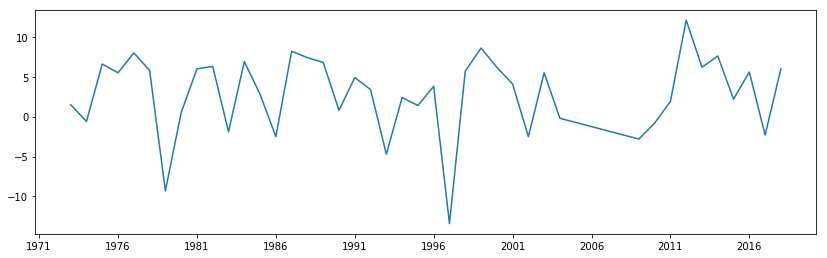

In [131]:
fig = plt.figure(figsize=(14,14))
ax = plt.subplot(311)
x = df_1_january.date
y = df_1_january.tavg
ax.xaxis_date()
ax.plot(x,y)

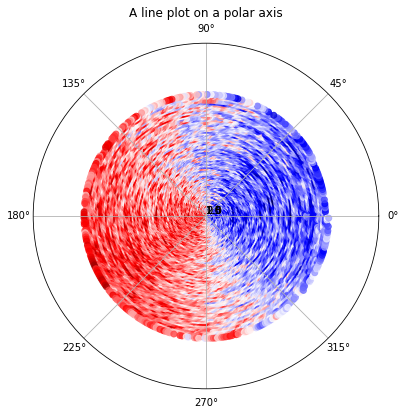

In [132]:
r = df.index.values 
theta = (2 * np.pi * df.loc[df.index.values == r].dayofyear)/366

#ax = plt.subplot(111, projection='polar')
colors = df.loc[df.index.values == r].tmax

fig = plt.figure()
ax = fig.add_axes([0.05, 0.4, 1.2, 1.2], polar=True)
ax.scatter(theta, r, c=colors, cmap='seismic', alpha=0.75)

#ax.plot(theta, r)
ax.set_rticks([0.5, 1, 1.5, 2])  # less radial ticks
ax.set_rlabel_position(-22.5)  # get radial labels away from plotted line
ax.grid(True)

ax.set_title("A line plot on a polar axis", va='bottom')
plt.show()

In [133]:
len(df)

26673

In [134]:
df.head()

date  prcp  tavg  tmax  tmin  year  month  day  dayofyear  \
0 1945-03-01   2.1   NaN   6.8  -0.9  1945      3    1         60   
1 1945-03-02   1.0   NaN   6.0  -1.0  1945      3    2         61   
2 1945-03-03   3.8   NaN   5.8   0.2  1945      3    3         62   
3 1945-03-04   4.4   NaN   6.8   0.0  1945      3    4         63   
4 1945-03-05   7.2   NaN   5.8   1.3  1945      3    5         64   

   tmax_std_dev  
0      0.747222  
1      2.034783  
2      2.281429  
3      1.614286  
4      2.623944

In [135]:
colors = df.loc[df.index.values == 5].tmax


In [136]:
colors

5    6.7
Name: tmax, dtype: float64

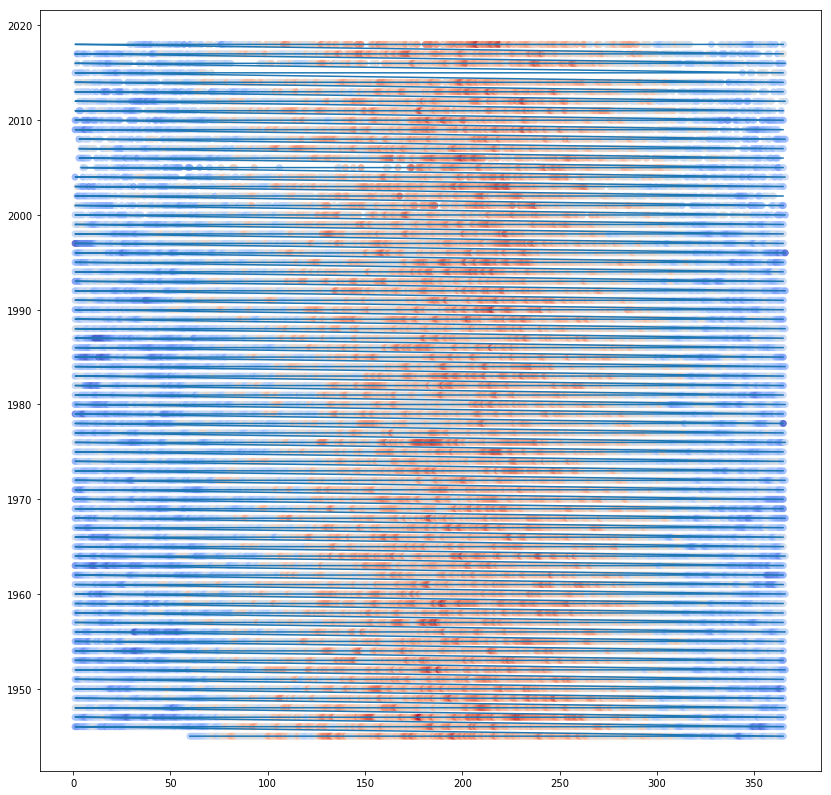

In [162]:
fig = plt.figure(figsize=(14,14))
ax = plt.subplot(111)
x = df.dayofyear
y = df.year
colors = df.loc[(df.year == y) & (df.dayofyear == x)].tmax
# try also with cmap='seismic' https://matplotlib.org/examples/color/colormaps_reference.html
ax.scatter(x, y, c=colors, cmap='coolwarm', alpha=0.75)
ax.plot(x,y)

In [161]:
df.loc[(df['year'] == 1989)  & (df['month'] == 9)].head()

date  prcp  tavg  tmax  tmin  year  month  day  dayofyear  \
16255 1989-09-01   0.0  15.2  19.0  12.5  1989      9    1        244   
16256 1989-09-02   3.5  12.1  16.1   8.6  1989      9    2        245   
16257 1989-09-03   1.1  11.6  17.5   7.2  1989      9    3        246   
16258 1989-09-04   0.0  10.8  16.9   6.6  1989      9    4        247   
16259 1989-09-05   0.0  14.0  20.1   7.5  1989      9    5        248   

       tmax_std_dev  
16255      2.216667  
16256      4.560274  
16257      3.690411  
16258      4.121918  
16259      1.311111